#         Prediction of Heart Disease 

## Import Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import recall_score,precision_score,f1_score,classification_report

print(" Import Complete")


 Import Complete


In [2]:
data =pd.read_csv("../input/logistic-regression-heart-disease-prediction/framingham_heart_disease.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


chd     - coronary heart disease

totchol -total cholestral

sysBP   - systolic blood pressure

diaBP  -diastolic blood pressure
(The blood pressure reading is measured in millimeters of mercury (mmHg) and is written as systolic pressure, the force of the blood against the artery walls as your heart beats, over diastolic pressure, the blood pressure between heartbeats. For example, a blood pressure reading is written as 120/80 mmHg, or "120 over 80".The systolic pressure is 120 and the diastolic pressure is 80.A normal diastolic blood pressure is lower than 80. A reading of 90 or higher means you have high blood pressure.)

In [3]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [4]:
data.isnull().sum().sort_values(ascending=False)

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
TenYearCHD           0
diaBP                0
sysBP                0
diabetes             0
prevalentHyp         0
prevalentStroke      0
currentSmoker        0
age                  0
male                 0
dtype: int64

In [5]:
data.shape

(4238, 16)

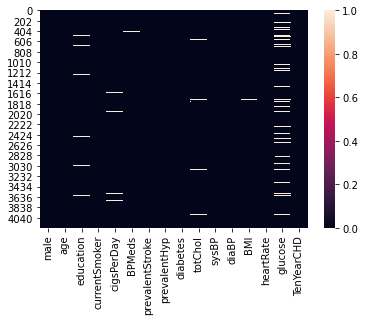

In [6]:
sns.heatmap(data.isnull())

Glucose column have more missing values than other columns So we have to impute by mean value
Glucose level and diabetes are mostly correlated so i take separate mean value of glucose level for non diabetes and diabetes patients

To know more about glucose and diabetes
https://www.medicalnewstoday.com/articles/317536#guidelines

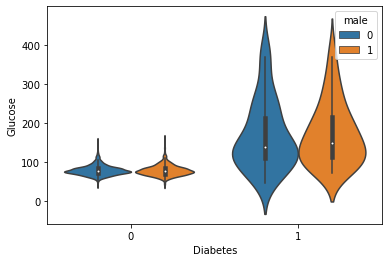

In [7]:
sns.violinplot(x=data['diabetes'],y=data['glucose'],hue=data['male'])
plt.xlabel('Diabetes')
plt.ylabel('Glucose')
plt.show()

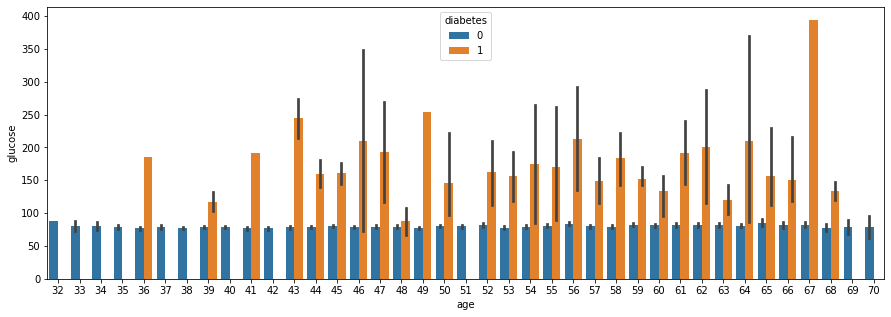

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(x=data['age'],y=data['glucose'],hue=data['diabetes'])

In [9]:
new = data[['diabetes','glucose']].groupby(by=['diabetes']).mean()
new.reset_index(inplace=True) 
new['glucose'][0]


79.48918558077436

In [10]:
data['glucose'][data['diabetes']==1]=[data['glucose'][data['diabetes']==1].fillna(new['glucose'][1])]
data['glucose'][data['diabetes']==0]=[data['glucose'][data['diabetes']==0].fillna(new['glucose'][0])]

#for i in data['diabetes'].unique())]]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
data['glucose'].isnull().sum()

0

we imputed values to Glucose column by its mean value 

In [12]:
data_cleaned=data.dropna(axis=0)
print('Shaoe cleaned data:',data_cleaned.shape)
data_cleaned.head()

Shaoe cleaned data: (3987, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


we deleted only 5% of data, it is acceptable 

# Logistic Regression

In [13]:
num_col=['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke',
         'prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']
x=data_cleaned[num_col]
y=data_cleaned['TenYearCHD']

x.shape ,y.shape

((3987, 15), (3987,))

In [14]:
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 1.14395266, -1.22839033,  1.97738686, ...,  0.29302574,
         0.34140147, -0.20888273],
       [-0.87416205, -0.40780713,  0.01769474, ...,  0.7244687 ,
         1.58251233, -0.2515231 ],
       [ 1.14395266, -0.17335478, -0.96215132, ..., -0.10654928,
        -0.07230215, -0.50736532],
       ...,
       [ 1.14395266,  0.17832374,  0.9975408 , ..., -1.48667648,
        -0.89970939,  0.21752096],
       [-0.87416205, -0.64225947, -0.96215132, ..., -1.62150241,
         0.83784581, -0.59264606],
       [-0.87416205,  0.29554991,  0.01769474, ..., -1.05523352,
         0.34140147, -0.46472495]])

### Train_Test_Split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,random_state = 26,test_size=.15)

print('Shape of X_train:',x_train.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of X_test:',x_test.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (3388, 15)
Shape of y_train: (3388,)
Shape of X_test: (599, 15)
Shape of y_test: (599,)


In [16]:
logreg = LogisticRegression().fit(x_train,y_train)
y_pred=logreg.predict(x_test)
#y_pred

In [17]:
from sklearn.metrics import recall_score,precision_score,f1_score,classification_report
print('Accuracy Score :',accuracy_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))
print('Recall Score:',recall_score(y_test,y_pred))
print('Precision Score',precision_score(y_test,y_pred))
print('Confusion Matrix:',confusion_matrix(y_test,y_pred))
#print('Classification Report:',classification_report(y_test,y_pred))

Accuracy Score : 0.8831385642737897
F1 Score: 0.125
Recall Score: 0.07042253521126761
Precision Score 0.5555555555555556
Confusion Matrix: [[524   4]
 [ 66   5]]


Accuracy is how well our model predict the result

        Accuracy = No.of Correct Predictions / Total number of Predictions


Precision measures how good our model is when the prediction is positive.

        Precision = TP/(TP+FP)

Recall measures how good our model is at correctly predicting positive classes.
        
        Recall = TP/(TP+FN)

We cannot try to maximize both precision and recall because there is a trade-off between them. 
  
  There is another measure that combines precision and recall into a single numbet: F1_score. It is the weighted average of precision and recall and calculated as:
            
            F1_Score = 2 (Precision* Recall)/(Precision + Recalll)



## Ridge Classifier

In [18]:
RC = RidgeClassifier().fit(x_train,y_train)
y_pred_RC = RC.predict(x_test)
#y_pred_RC

In [19]:
from sklearn.metrics import precision_score,f1_score,classification_report
print('Accuracy Score By lasso:',accuracy_score(y_test,y_pred_RC))
print('F1 Score:',f1_score(y_test,y_pred_RC))
print('Recall Score:',recall_score(y_test,y_pred_RC))
print('Precision Score',precision_score(y_test,y_pred_RC))
#print('Classification Report:',classification_report(y_test,y_pred_RC ))

Accuracy Score By lasso: 0.8864774624373957
F1 Score: 0.08108108108108109
Recall Score: 0.04225352112676056
Precision Score 1.0


Precision score is absolutely 1 , our model is perfect...

In [20]:
print('Confusion Matrix:', confusion_matrix(y_test,y_pred_RC))

Confusion Matrix: [[528   0]
 [ 68   3]]


There is no  Here we see that our model performs well in RidgeClassifier , because there is no rule to describe dataset is fiited to particular algorithm.So we have to analysze which algorithm is suited.

Kindly share your thoughts about this notebook and ask your questions on comment below.Suggest more methods to improve the accuracy and upvote my work...